<a href="https://colab.research.google.com/github/DarKenW/tensorflow-dojo/blob/main/Tensorflow_2_0%2B_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial Youtube Channel: [Netease Cloud Classroom: Tensorflow 2.0 Best Practice](https://www.youtube.com/playlist?list=PLh7DRwYmUgh7swOvZUZ52LMeGDmjFH0nv)

Tutorial Code Repo: [dragen1860/TensorFlow-2.x-Tutorials
](https://github.com/dragen1860/TensorFlow-2.x-Tutorials)



First of all, we need to remember these *Hero* contributes to the sucess of deep learning since 2012:
- Big Data
- ReLU
- Dropout
- BatchNorm
- ResNet
- Xavier Initialization
- Frameworks such as Caffe/Tensorflow/PyTorch
- ...

# Simple Linear Regression (Numpy)

In [ ]:
import pandas as pd

# put the github url of raw data
url = 'https://raw.githubusercontent.com/dragen1860/TensorFlow-2.x-Tutorials/master/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E4%B8%8ETensorFlow%E5%85%A5%E9%97%A8%E5%AE%9E%E6%88%98-%E6%BA%90%E7%A0%81%E5%92%8CPPT/lesson04-%E5%9B%9E%E5%BD%92%E9%97%AE%E9%A2%98%E5%AE%9E%E6%88%98/data.csv'
df = pd.read_csv(url, index_col=0)
df.to_csv('data.csv')

In [ ]:
ls

data.csv  sample_data/


In [ ]:
import numpy as np

Iteration Steps:
1. calculate loss 
2. calculate gradient (by take derivative of loss)
3. update gradient

In [ ]:
# y = wx + b
def compute_error_for_line_given_points(b, w, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # computer mean-squared-error
        totalError += (y - (w * x + b)) ** 2
    # average loss for each point
    return totalError / float(len(points))

In [ ]:
def step_gradient(b_current, w_current, points, learningRate):
    b_gradient = 0
    w_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        # grad_b = 2(wx+b-y)    #loss function对b求偏导
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        # grad_w = 2(wx+b-y)*x  #loss function对w求偏导
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    # update b'，w'
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

In [ ]:
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # update for several times
    for i in range(num_iterations):
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]

In [ ]:

def run():
	
    points = np.genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_w = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w,
                  compute_error_for_line_given_points(initial_b, initial_w, points))
          )
    print("Running...")
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".
          format(num_iterations, b, w,
                 compute_error_for_line_given_points(b, w, points))
          )
  

In [ ]:
run()

Starting gradient descent at b = 0, w = 0, error = 5565.10783448321
Running...
After 1000 iterations b = 0.08893651993741353, w = 1.4777440851894448, error = 112.61481011613472


# Simple Classification (MINIST)


iteration steps:
1. compute [h1, h2, out]
2. compute loss (MSE of predicted one hot  and actual one hot)
3. compute gradient and update [W1', b1', W2', b2', W3', B3']
4. Loop

In [ ]:
import  os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets

(x, y), (x_val, y_val) = datasets.mnist.load_data() 
print(type(x))

x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.     # convert numpy array to tensor
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10)

print(x.shape, x[0].shape, y.shape, y[0].shape) 

11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
(60000, 28, 28) (28, 28) (60000, 10) (10,)


60000 pics/data points, each pic has 28 by 28 pixel

each y array is a 1 by 10 size vector

In [ ]:
(xs, ys), _ = datasets.mnist.load_data() 

db = tf.data.Dataset.from_tensor_slices((xs, ys))

for step, (x, y) in enumerate(db):
  if step < 3:
    print(step, x.shape, y, y.shape)

0 (28, 28) tf.Tensor(5, shape=(), dtype=uint8) ()
1 (28, 28) tf.Tensor(0, shape=(), dtype=uint8) ()
2 (28, 28) tf.Tensor(4, shape=(), dtype=uint8) ()


In [ ]:
(xs, ys), _ = datasets.mnist.load_data() 

db = tf.data.Dataset.from_tensor_slices((xs, ys)).batch(10)   # feed 10 pics each batch

for step, (x, y) in enumerate(db):
  if step < 3:
    print(step, x.shape, y, y.shape)

0 (10, 28, 28) tf.Tensor([5 0 4 1 9 2 1 3 1 4], shape=(10,), dtype=uint8) (10,)
1 (10, 28, 28) tf.Tensor([3 5 3 6 1 7 2 8 6 9], shape=(10,), dtype=uint8) (10,)
2 (10, 28, 28) tf.Tensor([4 0 9 1 1 2 4 3 2 7], shape=(10,), dtype=uint8) (10,)


![](https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png)

In [ ]:
BATCH_SIZE = 200


import  os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets

# Data preparation
(x, y), (x_val, y_val) = datasets.mnist.load_data() 
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.    # convert numpy array to tensor
y = tf.convert_to_tensor(y, dtype=tf.int32)
y = tf.one_hot(y, depth=10)                             # convert label col to one hot encoding

print(x.shape, y.shape)

train_dataset = tf.data.Dataset.from_tensor_slices((x, y))   # tf 2.0 new feature: batch parellel processing
train_dataset = train_dataset.batch(BATCH_SIZE)   # feed 200 pics each batch, steps in each epoch = DATA_SIZE/BATCH_SIZE, if set BATCH_SIZE = 1 then we need to take
                                                  # the greater BATCH_SIZE, the fewer steps need to run each epoch
 

# Model preparation
model = keras.Sequential([ 
    layers.Dense(512, activation='relu'),    #Dense means Fully Connected Layer which learns non-linear combination of features extracted and compress to lower dim for classification
    layers.Dense(256, activation='relu'),    # dim 512 -> dim 256
    layers.Dense(10)])                       # dim 256 -> dim 10

# w' = w - learning rate * (dL / dw)
optimizer = optimizers.SGD(learning_rate=0.001)   # optimizers optimize the parameter updating process in back propargation phrase



# kick out training process
# Step1. compute output
# Step2. compute loss
# Step3. optimize, calculate gradients and update w1, w2, w3, b1, b2, b3


# DATA_SIZE = x.shape[0]

def train_epoch(epoch):

    # Step4.loop
    for step, (x, y) in enumerate(train_dataset):


        with tf.GradientTape() as tape:  
            # [b, 28, 28] => [b, 784]  b means "batch" here, we set batch size = 200 above  
            x = tf.reshape(x, (-1, 28*28))

            # Step1. compute output
            # [b, 784] => [b, 512] => [b, 256] => [b, 10]
            out = model(x)

            # Step2. compute loss
            loss = tf.reduce_sum(tf.square(out - y)) / x.shape[0]       # Loss = 1/N * sum[(y-out)^2]

        # Step3. optimize, calculate gradients and update w1, w2, w3, b1, b2, b3
        grads = tape.gradient(loss, model.trainable_variables)          # TF 2.0 can auto calculate gradients/partial derivatives of each parameters of each layer
        
        # update w1, w2, w3, b1, b2, b3
        # w' = w - lr * grad   
        optimizer.apply_gradients(zip(grads, model.trainable_variables))  # update parameters by using calculated gradients

        if step % 10 == 0:
            print(epoch, step, 'loss:', loss.numpy())



def train():

    #EPOCH = int(DATA_SIZE / BATCH_SIZE)

    for epoch in range(30):

        train_epoch(epoch)

(60000, 28, 28) (60000, 10)


In [ ]:
DATA_SIZE = x.shape[0]
#ATCH_SIZE = 600

# there are 30 epochs, and in each epoch, there are 300 (= DATA_SIZE / BATCH_SIZE) steps
train()

0 0 loss: 1.9211751
0 10 loss: 1.3088969
0 20 loss: 1.1034355
0 30 loss: 1.0043306
0 40 loss: 0.98944694
0 50 loss: 0.9430258
0 60 loss: 0.9480988
0 70 loss: 0.9556056
0 80 loss: 0.9227163
0 90 loss: 0.90278727
0 100 loss: 0.9153464
0 110 loss: 0.88243955
0 120 loss: 0.81762123
0 130 loss: 0.80281067
0 140 loss: 0.7477316
0 150 loss: 0.8343726
0 160 loss: 0.75582296
0 170 loss: 0.7841326
0 180 loss: 0.7650756
0 190 loss: 0.7546248
0 200 loss: 0.7275849
0 210 loss: 0.72219205
0 220 loss: 0.78244156
0 230 loss: 0.7443032
0 240 loss: 0.6900959
0 250 loss: 0.6982196
0 260 loss: 0.77524817
0 270 loss: 0.6883738
0 280 loss: 0.6788524
0 290 loss: 0.638344
1 0 loss: 0.6893913
1 10 loss: 0.6139842
1 20 loss: 0.62859625
1 30 loss: 0.57893366
1 40 loss: 0.645326
1 50 loss: 0.61447775
1 60 loss: 0.6228661
1 70 loss: 0.6685826
1 80 loss: 0.66540307
1 90 loss: 0.6209357
1 100 loss: 0.6735594
1 110 loss: 0.6702347
1 120 loss: 0.5918487
1 130 loss: 0.56884825
1 140 loss: 0.5469582
1 150 loss: 0.665872

# Basic TF Data structure

> Lets learn knowledge pieces by pieces first, and we will know why these pieces are so useful when we implement the deep learning network later on.




## Intro to tensor
We usually see a lof of different kinds of tensor, what do they mean:

- 4 dim tensor example: `[32, 24, 24, 3]`     
  in cv, this 4 dim tensor means 32 pics, each pic is a 24x24 matrix and there are 3 channels: r,g,b
- 4 dim tensor example: `[b, seq_len, word_dim]`      
  In nlp, this 4 dim tensor means `b` sentences, each sentence consists of `seq_len` words, and each word is a `word_dim` dimension vector
- 5 dim tensor example: `[task_num, b, seq_len, word_dim]`      
  In meta-learning, this 5 dim tensor means  `task_num` task, `b` sentences, each sentence consists of `seq_len` words, and each word is a `word_dim` dimension vector


1. int, float, double
2. string
3. bool

In [ ]:
import numpy as np

In [ ]:
tf.constant(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
tf.constant(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [ ]:
tf.constant(1, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
tf.constant(1., dtype=tf.double)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [ ]:
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [ ]:
tf.constant('hello world')

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

tensor type

In [ ]:
with tf.device('cpu'):
  a = tf.constant(1)

with tf.device('gpu'):
  b = tf.range(4)

In [ ]:
print(a.device)    # tensor a is saved in gpu
print(b.device)    # tensor b is saved in gpu

/job:localhost/replica:0/task:0/device:CPU:0
/job:localhost/replica:0/task:0/device:GPU:0



transfer data between gpu and cpu

warning: data manipuation cant happen across platform


In [ ]:
# tensor a is transfered to gpu
aa = a.gpu()
print(aa.device)

Instructions for updating:
Use tf.identity instead.
/job:localhost/replica:0/task:0/device:GPU:0


In [ ]:
b.numpy()   # tf tensor to numpy array

array([0, 1, 2, 3], dtype=int32)

In [ ]:
b.ndim

1

In [ ]:
b.shape

TensorShape([4])

In [ ]:
tf.rank(b)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [ ]:
tf.rank(tf.ones([2,3]))

<tf.Tensor: shape=(), dtype=int32, numpy=2>

check type

In [ ]:
tf.is_tensor(b)

True

In [ ]:
a.dtype

tf.int32

In [ ]:
a.dtype == tf.int32

True

Conver to tensor 
- `tf.cast(a, dtype = int)`
- `tf.constant(np_array)`
- `tf.convert_to_tensor(a)`
- `tensor.numpy()`
- `int(tensort)`

In [ ]:
a = np.arange(5)
a, a.dtype

(array([0, 1, 2, 3, 4]), dtype('int64'))

In [ ]:
aa = tf.convert_to_tensor(a)
aa

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [ ]:
aa = tf.convert_to_tensor(a, dtype=tf.int32)
aa

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [ ]:
tf.cast(a, dtype=tf.int32)   # cast tensor to different dtype

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [ ]:
b = tf.convert_to_tensor([0 ,1])
b

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([0, 1], dtype=int32)>

In [ ]:
tf.cast(b, dtype = tf.bool)    # 1,0 to bool

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([False,  True])>

`tf.Variable`

we can wrap tensors like **weights** into `tf.Variable` which turns to be trainable (which means tf will calculate gradients)

In [ ]:
weights = tf.range(5)
weights

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [ ]:
weights = tf.Variable(weights)
weights

<tf.Variable 'Variable:0' shape=(5,) dtype=int32, numpy=array([0, 1, 2, 3, 4], dtype=int32)>

In [ ]:
weights = tf.Variable(weights, name = 'initial weights')
weights.name, weights.trainable    # becaome trainable

('initial weights:0', True)

In [ ]:
weights.dtype, tf.is_tensor(weights)     # variables data are still tensor

(tf.int32, True)

In [ ]:
weights.numpy()     # tensor/variable to numpy

array([0, 1, 2, 3, 4], dtype=int32)

Create/initiate tensor

Weights initation like Xavier and He methods are widely implemented in deep learning

1. `tf.fill()`   fill tensor with any value in any shape
2. `tf.ones()` & `tf.ones_like()`
3. `tf.zeros()` & `tf.zeros_like()`
4. `tf.random.normal()` 
5. `tf.random.truncated_normal()` # can help avoid gradient vanish
6. `tf.random.uniform()`

In [ ]:
tf.convert_to_tensor([1, 2.])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [ ]:
tf.ones([2,3]) # feed shape 2x3 [0]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [ ]:
tf.zeros([2,3]) # feed shape 2x3 [0]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [ ]:
tf.fill([2,3], 5)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[5, 5, 5],
       [5, 5, 5]], dtype=int32)>

In [ ]:
tf.random.truncated_normal([2,3], mean = 1, stddev=3)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5.484226 , -1.404146 , -1.4366832],
       [ 3.7063744, -0.9537686,  0.937595 ]], dtype=float32)>

In [ ]:
tf.random.uniform([3,3], minval =0, maxval = 1)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.3308277 , 0.30213332, 0.9616064 ],
       [0.8487315 , 0.99455154, 0.7795495 ],
       [0.48687196, 0.766085  , 0.44331813]], dtype=float32)>

Random permutation

1. `tf.gather(a, shuffled_idx)`   # shuffle the order/row of input data

In [ ]:
idx = tf.range(5)
idx = tf.random.shuffle(idx)
idx

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([4, 3, 1, 2, 0], dtype=int32)>

In [ ]:
a = tf.random.normal([5, 784])
b = tf.random.uniform([5], minval= 10, maxval=30, dtype=tf.float32)

In [ ]:
a

<tf.Tensor: shape=(5, 784), dtype=float32, numpy=
array([[-0.85705024,  0.22482744, -1.4012432 , ..., -0.72257996,
        -0.2506269 ,  0.9059631 ],
       [-0.8646298 ,  1.2941447 ,  0.35352546, ...,  0.50852185,
         1.7029588 , -0.3078736 ],
       [-0.03236101,  1.196351  ,  0.9648994 , ...,  1.9289964 ,
         0.97349554,  1.2714056 ],
       [ 2.151031  , -0.05654513, -0.42885292, ...,  0.43904564,
         0.48725885,  0.49210334],
       [ 0.5162558 , -2.3016114 , -0.5382874 , ...,  2.2245183 ,
        -0.84472406, -0.28568125]], dtype=float32)>

In [ ]:
# shuffle the order/row of matrix
a = tf.gather(a, idx)
b = tf.gather(b, idx)
a

<tf.Tensor: shape=(5, 784), dtype=float32, numpy=
array([[ 0.5162558 , -2.3016114 , -0.5382874 , ...,  2.2245183 ,
        -0.84472406, -0.28568125],
       [ 2.151031  , -0.05654513, -0.42885292, ...,  0.43904564,
         0.48725885,  0.49210334],
       [-0.8646298 ,  1.2941447 ,  0.35352546, ...,  0.50852185,
         1.7029588 , -0.3078736 ],
       [-0.03236101,  1.196351  ,  0.9648994 , ...,  1.9289964 ,
         0.97349554,  1.2714056 ],
       [-0.85705024,  0.22482744, -1.4012432 , ..., -0.72257996,
        -0.2506269 ,  0.9059631 ]], dtype=float32)>

Vector


In [ ]:
# each layer: X@W + b
net = layers.Dense(10)
net.build((4, 8))
net.kernel    # check layer weights: W -> (8X10)

<tf.Variable 'kernel:0' shape=(8, 10) dtype=float32, numpy=
array([[-0.3816467 , -0.36376473,  0.00476092,  0.03919959, -0.4690649 ,
         0.07725364, -0.56319577, -0.25802988, -0.3386038 , -0.32864472],
       [-0.00929528, -0.25295675,  0.54702234, -0.50549036, -0.0574891 ,
        -0.22451696, -0.39834088,  0.27013618,  0.31665754,  0.01828212],
       [-0.01452452,  0.31905198, -0.13319775,  0.39377433, -0.3123368 ,
        -0.302458  ,  0.22428954, -0.52465343,  0.5617846 ,  0.36701232],
       [-0.51607835,  0.4164285 ,  0.07584518, -0.16538715, -0.2665623 ,
        -0.33898175,  0.46941566,  0.22248358,  0.33132148,  0.17028081],
       [-0.11108068,  0.121077  ,  0.3352521 ,  0.19136906,  0.17238754,
         0.00319916,  0.5517664 , -0.12145501, -0.49369022, -0.13620582],
       [-0.41553432, -0.01577592, -0.4477858 , -0.5530803 ,  0.06270432,
        -0.4845107 ,  0.3245266 ,  0.2847916 ,  0.55851555,  0.28551316],
       [ 0.51643574, -0.50582004,  0.4126022 , -0.3438605 

In [ ]:
net.bias    # check layer bias: W -> (8X10)b -> (1X10)

<tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

Implementation：Loss calculation

In [ ]:
out = tf.random.uniform([4, 10])
out    # output layer outputs the probility of each class (4 outputs, 10 classes)

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[0.8138162 , 0.2909956 , 0.00321054, 0.90989864, 0.33530498,
        0.25106192, 0.22276795, 0.05527127, 0.98479366, 0.02541316],
       [0.4705137 , 0.7318162 , 0.14017451, 0.3719399 , 0.23778558,
        0.9665227 , 0.0013175 , 0.10251021, 0.21956897, 0.821381  ],
       [0.6213106 , 0.15109909, 0.75418425, 0.6293026 , 0.06764877,
        0.915969  , 0.35134423, 0.02708745, 0.48705816, 0.15729213],
       [0.08266449, 0.55585515, 0.6655718 , 0.3584609 , 0.9622514 ,
        0.43881166, 0.95235336, 0.92095065, 0.40237033, 0.6835475 ]],
      dtype=float32)>

In [ ]:
y = tf.range(4)
y = tf.one_hot(y, depth= 10)
y   # actual labels -> one hot encoding

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
loss_list = tf.keras.losses.mse(y, out)    # tf keras API calculates mean of squared errors
loss_list

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.2145875 , 0.21753892, 0.20950237, 0.46731156], dtype=float32)>

In [ ]:
loss = tf.reduce_mean(loss_list)  
loss    # scalar

<tf.Tensor: shape=(), dtype=float32, numpy=0.2772351>

Implementation: Maxtrix dim evolves

In [ ]:
x = tf.random.normal([4, 784])   # 4 pics, each pic is a 1*784 vector
x.shape

TensorShape([4, 784])

In [ ]:
net = layers.Dense(10)
net.build((4, 784))

In [ ]:
net(x).shape

TensorShape([4, 10])

In [ ]:
net.kernel.shape

TensorShape([784, 10])

In [ ]:
net.bias.shape

TensorShape([10])

## Indexing & slicing

Basic indexing (python-style)

In [ ]:
a = tf.ones([1,2,3, 4]) # 1[2[3,4]]
a

<tf.Tensor: shape=(1, 2, 3, 4), dtype=float32, numpy=
array([[[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]]], dtype=float32)>

In [ ]:
a[0][0]

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
a[0][0][0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [ ]:
a[0][0][0][2]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

Basic indexing (numpy-style) 

In [ ]:
a = tf.random.normal([2,28,28,3])  # two pics, each pics contains 28x28 pixel, 3channels


In [ ]:
a[1].shape 

TensorShape([28, 28, 3])

In [ ]:
a[1, 2].shape # a[1][2]  second pics and 3rd row is a [28x3] tensor

TensorShape([28, 3])

In [ ]:
a[1,2,3]   # a[1][2][3]  second pics and 3rd row 4th column is a [1x3] tensor, they are all channels

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.43245754,  0.37991   , -0.86595947], dtype=float32)>

In [ ]:
a[1,2,3,2].shape   # output is a scalar, which means one of the channels

TensorShape([])

Basic Slicing

In [ ]:
a = tf.range(10)
a

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
a[-3:]

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([7, 8, 9], dtype=int32)>

In [ ]:
a = tf.random.normal([2,28,28,3])  # two pics, each pics contains 28x28 pixel, 3channels
a.shape

TensorShape([2, 28, 28, 3])

In [ ]:
a[0,:,:].shape

TensorShape([28, 28, 3])

In [ ]:
a[0,:,3,:].shape  # first pic, all rows, 4th col, all channel

TensorShape([28, 3])

In [ ]:
a[0,18:22:2,3,::2].shape  #

TensorShape([2, 2])

use `...` in slicing

In [ ]:
a = tf.random.normal([4, 2,28,28,3])  # four tasks, two pics, each pics contains 28x28 pixel, 3channels
a.shape

TensorShape([4, 2, 28, 28, 3])

In [ ]:
a[0,...].shape

TensorShape([2, 28, 28, 3])

In [ ]:
a[0,...,2].shape

TensorShape([2, 28, 28])

In [ ]:
a[...,0].shape

TensorShape([4, 2, 28, 28])

Selective indexing

- `tf.gather(a, perm = index_list)` # need axis param
- `tf.gather_nd()`   # doesnt need axis param
 - `[[0],[1],...]`
 - `[[0, 0], [1, 1]]`
- `tf.boolean_mask()`

In [ ]:
a = tf.random.normal([4,35,8])  # 4 classes, 35 students, 8 subjects
a.shape

TensorShape([4, 35, 8])

In [ ]:
tf.gather(a, axis = 0, indices= [2,3]).shape   # sample student 3 and 4

TensorShape([2, 35, 8])

In [ ]:
a[2:3,].shape

TensorShape([1, 35, 8])

In [ ]:
tf.gather(a, axis = 0, indices= [2,1, 3, 0]).shape   # sample 4 classes in preset order 

TensorShape([4, 35, 8])

In [ ]:
tf.gather(a, axis = 1, indices= [2,1, 3, 0,3]).shape   # sample 4 classes, 5 students and 8 subjects

TensorShape([4, 5, 8])

In [ ]:
tf.gather(a, axis = 2, indices= [2,3,7]).shape   # sample 4 classes, 35 students and 3 subjects

TensorShape([4, 35, 3])

In [ ]:
a = tf.random.normal([4,35,8])  # 4 classes, 35 students, 8 subjects
a.shape

TensorShape([4, 35, 8])

In [ ]:
tf.gather_nd(a,  [0]).shape   # sample 1 classes, 35 students and 8 subjects

TensorShape([35, 8])

In [ ]:
tf.gather_nd(a,  [0, 1]).shape   # sample 1 classes, 1 students and 3 subjects

TensorShape([8])

In [ ]:
tf.gather_nd(a,  [0,1,2]).shape   # sample 1 classes, 1 students and 1 subjects

TensorShape([])

In [ ]:
tf.gather_nd(a,  [[0,1,2]]).shape   # sample 1 classes, 1 students and 1 subjects

TensorShape([1])

In [ ]:
tf.gather_nd(a,  [[0,0], [1,1]]).shape   # sample 1 classes, 1 students and 1 subjects

TensorShape([2, 8])

In [ ]:
tf.gather_nd(a,  [[0,0,0], [1,1,1], [2,2,2]]).shape   # sample 3 classes, 3 students and 3 subjects

TensorShape([3])

In [ ]:
a.shape

TensorShape([4, 35, 8])

In [ ]:
tf.boolean_mask(a, axis =0, mask=[True, False, True,False]).shape

TensorShape([2, 35, 8])

In [ ]:
tf.boolean_mask(a, axis =2, mask=[True, False, True,False,True, False, True,False]).shape # only chose 4 subjects

TensorShape([4, 35, 4])

In [ ]:
a = tf.ones([2,3,4])

In [ ]:
tf.boolean_mask(a, mask=[[True, False, True], [False, True,False]]).shape    # chose 3 rows in total

TensorShape([3, 4])

## Tensor reshaping
1. `tf.reshape(expected_shape)`
2. `tf.expand_dims/squeeze()`
3. `tf.transpose()`
4. `tf.broadcast_to()`

In [ ]:
a = tf.random.normal([4, 28, 28, 3])

In [ ]:
a.shape, a.ndim

(TensorShape([4, 28, 28, 3]), 4)

In [ ]:
tf.reshape(a, [4, 784, 3]).shape

TensorShape([4, 784, 3])

In [ ]:
tf.reshape(a, [4, -1]).shape

TensorShape([4, 2352])

In [ ]:
tf.reshape(a, [4, -1, 3]).shape

TensorShape([4, 784, 3])

`tf.transpose()` can help permute the dimensions according to the value of perm.

e.g. TF requires image input data  tensor shape be like `[4, 28, 28, 3] (b, H, W, C)`, but pyTorch requires input data dim be like `[4, 3, 28, 28]`, we can use `transpose` to reshape the data

In [ ]:
a = tf.random.normal([4, 28, 28, 3])   

In [ ]:
tf.transpose(a, perm =[0, 3, 1, 2]).shape 

TensorShape([4, 3, 28, 28])

In [ ]:
a = tf.random.normal([4, 35, 8]) # 4 classes, 35 students/class, 8 subjects/student

In [ ]:
tf.expand_dims(a, axis = 0).shape # 1 school, 4 classes/school, 35 students/class, 8 subjects/student

TensorShape([1, 4, 35, 8])

In [ ]:
tf.expand_dims(a, axis = -2).shape

TensorShape([4, 35, 1, 8])

In [ ]:
tf.squeeze(tf.expand_dims(a, axis = 0), axis=0).shape    # remove school dim

TensorShape([4, 35, 8])

## Split and combine
- `tf.concat([a, b])`
- `tf.stack([a, b], axis = 0)`  # create new dim
- `tf.unstack(c, axis = 0)` # Unpacks the given dimension of a `rank-R` tensor into `rank-(R-1)` tensors.
- `tf.split(c, axis = 0, num_or_size_split = 2)` # split according rows



## Sort (accuracy calculation)

- `tf.sort(a, direction = 'DESCENDING')`
- `tf.argsort(a, direction = 'DESCENDING')`
- `tf.math.top_k(a, 2)`   # 最大的前两个值
   - `tf.math.top_k(a, 2).indices`
   - `tf.math.top_k(a, 2).values`
### top_k accuracy


In [ ]:

import  tensorflow as tf
import  os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(2467)

def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.shape[0]

    pred = tf.math.top_k(output, maxk).indices
    pred = tf.transpose(pred, perm=[1, 0])
    target_ = tf.broadcast_to(target, pred.shape)
    # [10, b]
    correct = tf.equal(pred, target_)

    res = []
    for k in topk:
        correct_k = tf.cast(tf.reshape(correct[:k], [-1]), dtype=tf.float32)
        correct_k = tf.reduce_sum(correct_k)
        acc = float(correct_k* (100.0 / batch_size) )
        res.append(acc)

    return res



output = tf.random.normal([10, 6])
output = tf.math.softmax(output, axis=1)
target = tf.random.uniform([10], maxval=6, dtype=tf.int32)
print('prob:', output.numpy())
pred = tf.argmax(output, axis=1)
print('pred:', pred.numpy())
print('label:', target.numpy())

acc = accuracy(output, target, topk=(1,2,3,4,5,6))
print('top-1-6 acc:', acc)

prob: [[0.25310278 0.21715644 0.16043882 0.13088997 0.04334083 0.19507109]
 [0.05892418 0.04548917 0.00926314 0.14529602 0.66777605 0.07325139]
 [0.09742808 0.08304427 0.07460099 0.04067177 0.626185   0.07806987]
 [0.20478569 0.12294924 0.12010485 0.13751231 0.36418733 0.05046057]
 [0.11872064 0.31072393 0.12530336 0.1552888  0.2132587  0.07670452]
 [0.01519807 0.09672114 0.1460476  0.00934331 0.5649092  0.16778067]
 [0.04199061 0.18141054 0.06647632 0.6006175  0.03198383 0.07752118]
 [0.09226219 0.2346089  0.13022321 0.16295874 0.05362028 0.3263266 ]
 [0.07019574 0.0861177  0.10912605 0.10521299 0.2152082  0.4141393 ]
 [0.01882887 0.26597694 0.19122466 0.24109262 0.14920162 0.13367532]]
pred: [0 4 4 4 1 4 3 5 5 1]
label: [0 2 3 4 2 4 2 3 5 5]
top-1-6 acc: [40.0, 40.0, 50.0, 70.0, 80.0, 100.0]


## Padding and Tile (image padding)

- `tf.pad(a, [[0,1], [1, 0]])`  # only padding top row and left col
- `tf,tile(a, [1, 2])`   # only copy rows, `tf.broadcast_to()` is better

In [ ]:
a = tf.reshape(tf.range(9), [3, 3])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [ ]:
tf.pad(a, [[1,1], [1,0]]) # top row, bot row, left col

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[0, 0, 0, 0],
       [0, 0, 1, 2],
       [0, 3, 4, 5],
       [0, 6, 7, 8],
       [0, 0, 0, 0]], dtype=int32)>

In [ ]:
a = tf.random.normal([4,28,28,3])
b = tf.pad(a, [[0,0], [2,2], [2,2], [0, 0]])    # only padding top row and left col of image pixels
b.shape

TensorShape([4, 32, 32, 3])

In [ ]:
a = tf.reshape(tf.range(9), [3, 3])
a

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]], dtype=int32)>

In [ ]:
tf.tile(a, [2,3]) # copy row twice and copy col three times

<tf.Tensor: shape=(6, 9), dtype=int32, numpy=
array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8, 6, 7, 8],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8, 6, 7, 8]], dtype=int32)>

## Clip (gradient exploding/vanishing)

- `tf.maximum(a, 2)`   # lower limit = 2
- `tf.minimum(a, 8)`   # upper limit = 8
- `tf.nn.relu(a)`   #max(x, 0)
- `tf.clip_by_value(a, 2, 8)` # lower limit = 2 and upper limit = 8
- `tf.clip_by_norm(a, 15)` 
- `tf.clip_by_global_norm(grads, 15)`     # deal with gradient exploding and gradient vanishing by clip by global norm


In [ ]:
a = tf.range(-5, 9)
a

<tf.Tensor: shape=(14,), dtype=int32, numpy=
array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8],
      dtype=int32)>

In [ ]:
tf.nn.relu(a)

<tf.Tensor: shape=(14,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>

In [ ]:
tf.nn.relu6(a)

<tf.Tensor: shape=(14,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 6, 6], dtype=int32)>

we can conclude that `tf.clip_by_global_norm(grads, 15)` can hugely boost the training speed. by comparing the loss after 3500 steps and find that 

In [ ]:
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers
import  os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

(x, y), _ = datasets.mnist.load_data()
x = tf.convert_to_tensor(x, dtype=tf.float32) / 50.
y = tf.convert_to_tensor(y)
y = tf.one_hot(y, depth=10)
print('x:', x.shape, 'y:', y.shape)
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128).repeat(30)
x,y = next(iter(train_db))
print('sample:', x.shape, y.shape)
# print(x[0], y[0])



def main():

    # 784 => 512
    w1, b1 = tf.Variable(tf.random.truncated_normal([784, 512], stddev=0.1)), tf.Variable(tf.zeros([512]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.truncated_normal([512, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.truncated_normal([256, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))



    optimizer = optimizers.SGD(lr=0.01)


    for step, (x,y) in enumerate(train_db):

        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 784))

        with tf.GradientTape() as tape:

            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)

            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y-out)
            # [b, 10] => [b]
            loss = tf.reduce_mean(loss, axis=1)
            # [b] => scalar
            loss = tf.reduce_mean(loss)



        # compute gradient
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # print('==before==')
        # for g in grads:
        #     print(tf.norm(g))
        
        grads,  _ = tf.clip_by_global_norm(grads, 15)   

        # print('==after==')
        # for g in grads:
        #     print(tf.norm(g))
        #update w' = w - lr*grad
        optimizer.apply_gradients(zip(grads, [w1, b1, w2, b2, w3, b3]))



        if step % 100 == 0:
            print(step, 'loss:', float(loss))




# if __name__ == '__main__':
#     main()

#main()

2.4.1
x: (60000, 28, 28) y: (60000, 10)
sample: (128, 28, 28) (128, 10)


## Broadcasting

when we do high-dim tensor + low-dim tensor, the calculation only implies to according lower dim, it reduces tons of memory consumption.

e.g. X@W + b -> [60k*784][784, 10] + [bias]


`tf.broadcast_to(tf.random.normal([4,1,1,1]),[4,32,32,3])`

In [ ]:
a = tf.random.normal([4, 35, 8]) # 4 classes, 35 students/class, 8 subjects/student
a[0,0,0], a.shape

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0483129>,
 TensorShape([4, 35, 8]))

In [ ]:
(a+[5.0])[0,0,0]   # every student's score + 5

<tf.Tensor: shape=(), dtype=float32, numpy=6.048313>

In [ ]:
a = tf.random.normal([4, 28, 28, 3])   

In [ ]:
(a + tf.random.normal([3])).shape

TensorShape([4, 28, 28, 3])

In [ ]:
(a + tf.random.normal([28,28,1])).shape

TensorShape([4, 28, 28, 3])

In [ ]:
(a + tf.random.normal([4,1,1,1])).shape

TensorShape([4, 28, 28, 3])

In [ ]:
#(a + tf.random.normal([1,4,1,1])).shape

## Math
- `tf.math.log(a)`
- `tf.exp(a)`
- `tf.sqrt(a)`
- `tf.square(a)`   #  square every item in a tensor 
- `tf.pow(a,3)` or `a**3`   
- `tf.matmul(a,b)` or `a@b`   --> matrix multiplication: `[4,2,3]@[4,3,5] = [4,2,5]`
- `tf.multiply(a,b)` or `a*b`  -->  element-wise multiplication (dot production), need a and b are in same shape
- `tf.reduce_sum(_, axis=1)` -> row-wise calculation: `[[1,2] -> [3]`, `[[1,2],[3,4] -> [3,7]`

In [ ]:
x = tf.ones([4,2])
W = tf.constant([[1.], [-5.]])
b = tf.constant([0.1])

In [ ]:
out = x@W + b
out

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-3.9],
       [-3.9],
       [-3.9],
       [-3.9]], dtype=float32)>

In [ ]:
tf.nn.relu(out)   # ReLU layer filters all negative items

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

## Statistics

- `tf.norm()` is equiv. to `tf.sqrt(tf.reduce_sum(tf.square(a)))`
- `tf.norm(a, ord=1, axis = 0)`  # L1-norm on axis 1
- `tf.reduce_min/max/mean(a)`  # global min/max
- `tf.reduce_min/max/mean(a, axis = 0)`  # min/max on axis 0, reduce dimension
- `tf.argmax()` # min/max of axis 0
- `tf.equal(a, b)` # compare two tensors
- `tf.unique()`



## Advanced Operation
- `tf.where(mask)`          # return indices of true
- `tf.where(mask, A, B)`   # if true go A, otherwise go B
- `tf.scatter_nd(indices, updates, shape)`   # update according pos with given value
- `tf.meshgrd(x_linspace, y_linspace)`


points: (500, 500, 2)
z: (500, 500)


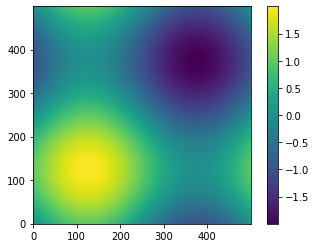

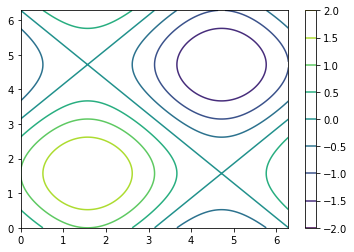

In [ ]:
import tensorflow as tf

import matplotlib.pyplot as plt


def func(x):
    """
    :param x: [b, 2]
    :return:
    """
    z = tf.math.sin(x[...,0]) + tf.math.sin(x[...,1])

    return z


x = tf.linspace(0., 2*3.14, 500)
y = tf.linspace(0., 2*3.14, 500)
# [50, 50]
point_x, point_y = tf.meshgrid(x, y)
# [50, 50, 2]
points = tf.stack([point_x, point_y], axis=2)
# points = tf.reshape(points, [-1, 2])
print('points:', points.shape)
z = func(points)
print('z:', z.shape)

plt.figure('plot 2d func value')
plt.imshow(z, origin='lower', interpolation='none')
plt.colorbar()

plt.figure('plot 2d func contour')
plt.contour(point_x, point_y, z)
plt.colorbar()
plt.show()

## Load dataset

- `tf.keras.datasets.mnist.load_data()` 
- `tf.data.Dataset.from_tensor_slices()` # best way to convert dataset to tensors
 - `db.shuffle(1000)`
 - `db.map(preprocess)`
 - `db.batch(200)`
 - `db.repeat()`

 regular pipeline:
 1. laod numpy dataset from kera.Data API
 2. one-hot encoding for y
 3. load into sliced TensorFlow tensor dataset
 4. shuffle dataset and creat batches 
 5. preprocess (change dtype and minmax normalization)

In [ ]:
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import datasets, layers, optimizers
import  os

os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
print(tf.__version__)

def prepare_mnist_feature_and_labels(x, y):
  x = tf.cast(x, tf.float32) / 255.
  y = tf.cast(y, tf.int32)
  return x, y

def load_dataset():
  #(x, y), _ = tf.keras.datasets.mnist.load_data()   # still numpy array, need to wrap into tensor for tensorflow use
  #(x, y), _ = tf.keras.datasets.cifar10.load_data()   # still numpy array, need to wrap into tensor for tensorflow use
  (x, y), (x_val, y_val) = tf.keras.datasets.fashion_mnist.load_data()   # still numpy array, need to wrap into tensor for tensorflow use
  #print(x.min(), x.max(), x.mean())
  # next(iter(x)).shape   # check x's content 

  y = tf.one_hot(y, depth = 10)
  y_val = tf.one_hot(y_val, depth = 10)

  ds = tf.data.Dataset.from_tensor_slices((x, y)) # conver to tensor      
  ds = ds.map(prepare_mnist_feature_and_labels)
  ds = ds.shuffle(60000).batch(100)

  ds_val = tf.data.Dataset.from_tensor_slices((x, y))
  ds_val = ds_val.map(prepare_mnist_feature_and_labels)
  ds_val = ds_val.shuffle(60000).batch(100) 

  return ds, ds_val



2.4.1


In [ ]:
load_dataset()

4423680/4422102 [==============================] - 0s 0us/step


(<BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int32)>,
 <BatchDataset shapes: ((None, 28, 28), (None, 10)), types: (tf.float32, tf.int32)>)

In [ ]:
train_db = tf.data.Dataset.from_tensor_slices((x,y)).batch(128)  # batch processing

## Project: Forward propargation (tensor low level)

some points worth mentioning:
- weights, bias and loss should be wrapped into `tf.Varable()` for gradient calculation
= weights initialization is extremely important, otherwise it will cause gradient vanishing
- larger batch size means fewer trsining steps in each epoch
- `tf.float32` is a suitable dtype for training data


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

def preprocess(x, y):
    """
    :param x:
    :param y:
    :return:
    """
    # [b, 28, 28], [b]
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [-1, 28*28])   
    y = tf.cast(y, dtype=tf.int32)
    y = tf.one_hot(y, depth=10)

    return x,y

    
# x: [60k, 28, 28]
# y: [60k]
#(x, y), _ = datasets.mnist.load_data()
(x, y), (x_test, y_test) = datasets.mnist.load_data()
print('x:', x.shape, 'y:', y.shape, 'x test:', x_test.shape, 'y test:', y_test)

############################## replaced by preprocess function ########################
# x = tf.convert_to_tensor(x, dtype = tf.float32) / 255.    # min-max normalize
# y = tf.convert_to_tensor(y, dtype = tf.int32)

# x_test = tf.convert_to_tensor(x_test, dtype = tf.float32) / 255.    # min-max normalize
# y_test = tf.convert_to_tensor(y_test, dtype = tf.int32)

# print(x.shape, y.shape, x.dtype, y.dtype)
# print(tf.reduce_min(x), tf.reduce_max(x))  #check min and max value of x
# print(tf.reduce_min(y), tf.reduce_max(y))  #label: 0-9
########################################################################################

train_db = tf.data.Dataset.from_tensor_slices((x, y))
train_db = train_db.shuffle(60000).batch(128).map(preprocess).repeat(30)

test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_db = test_db.shuffle(10000).batch(128).map(preprocess)

# x,y = next(iter(train_db))
# print('train sample:', x.shape, y.shape)

# check train_db content
# train_iter = iter(train_db)
# sample = next(train_iter)

# print('batch', sample[0].shape, sample[1].shape)

# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]

# learning rate
lr = 1e-3

############################## verbose code ############################################
# weights initialization, must change default stddev=1 to stddev=0.1
# w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1)) # need to wrap w, b into tf.Vraible() to enable gradient descent
# b1 = tf.Variable(tf.zeros([256]))
# w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
# b2 = tf.Variable(tf.zeros([128]))
# w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
# b3 = tf.Variable(tf.zeros([10]))
########################################################################################

# 784 => 512
w1, b1 = tf.Variable(tf.random.truncated_normal([784, 512], stddev=0.1)), tf.Variable(tf.zeros([512]))
# 512 => 256
w2, b2 = tf.Variable(tf.random.truncated_normal([512, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
# 256 => 10
w3, b3 = tf.Variable(tf.random.truncated_normal([256, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))


for epoch in range(100):

  # trsining 
  for step, (x, y) in enumerate(train_db):   # barch processing
    # x:[128,28,28]         # process 128 pics / batch
    # y:[128]

    # [b, 28*28] => [b, 28*28]
    #print(x.shape)
    x = tf.reshape(x,[-1, 28*28])
    #print(x.shape)

    with tf.GradientTape() as tape:    #gradient descent wrapper， to use tf.GradientTape() you should put all computation under tf.GradientTape()
      # x:[b, 28*28]
      # h1 = x@w + b1
      # [b,782]@[784,256] + [256] -> [b, 256] + [256]
      h1 = x@w1 + b1
      h1 = tf.nn.relu(h1)
      # [b, 256] => [b, 128]
      h2 = h1@w2 + b2
      h2 = tf.nn.relu(h2)
      # [b, 128] => [b, 10]
      out = h2@w3 + b3

      # compute loss
      # out: [b, 10]
      # y:[b] => [b, 10]
      #y_onehot = tf.one_hot(y, depth=10)

      # mse = mean(sum(y-out)^2)
      loss = tf.square(y - out)
      loss = tf.reduce_mean(loss) 

    # compute gradients
    grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])   # all gradents will be saved in grads

    #grads,  _ = tf.clip_by_global_norm(grads, 15)

############################## verbose code ############################################
    # w1 = w1 - lr * grads[0]
    # b1 = b1 - lr * grads[1]
    # w2 = w2 - lr * grads[2]
    # b2 = b2 - lr * grads[3]
    # w3 = w3 - lr * grads[4]
    # b3 = b3 - lr * grads[5]
    # w1.assign_sub(lr * grads[0]) # need to keep assigning tf.Variable() for output
    # b1.assign_sub(lr * grads[1])
    # w2.assign_sub(lr * grads[2])
    # b2.assign_sub(lr * grads[3])
    # w3.assign_sub(lr * grads[4])
    # b3.assign_sub(lr * grads[5])
########################################################################################

    # update w' = w - lr * grad of w 
    for p, g in zip([w1, b1, w2, b2, w3, b3], grads):   # w1 - lr * grad of w 
        p.assign_sub(lr * g)

    if step%500 == 0:
      print('epoch: ',epoch, 'step: ',step, 'loss: ', float(loss))


    # testing /evaluation
    if step % 500 == 0:
              total, total_correct = 0., 0

              for step, (x, y) in enumerate(test_db):
                  # layer1.
                  h1 = x @ w1 + b1
                  h1 = tf.nn.relu(h1)
                  # layer2
                  h2 = h1 @ w2 + b2
                  h2 = tf.nn.relu(h2)
                  # output
                  out = h2 @ w3 + b3
                  # [b, 10] => [b]
                  pred = tf.argmax(out, axis=1)
                  # convert one_hot y to number y
                  y = tf.argmax(y, axis=1)
                  # bool type
                  correct = tf.equal(pred, y)
                  # bool tensor => int tensor => numpy
                  total_correct += tf.reduce_sum(tf.cast(correct, dtype=tf.int32)).numpy()
                  total += x.shape[0]
                  acc = total_correct/total

              print("Evaluate Step: ", step, 'Evaluate Acc:', acc)



# Tesorflow & Deep Learning

## Fully Connected Layer / MLP

- `tf.keras.layers.Dense(out_shape)`

In [ ]:
import tensorflow as tf 
from 	tensorflow import keras

x = tf.random.normal([2, 3])

model = keras.Sequential([
		keras.layers.Dense(2, activation='relu'),  
		keras.layers.Dense(2, activation='relu'),
		keras.layers.Dense(2)    # output layer doesnt need activation function
	])

model.build(input_shape=[None, 3])    # weights initializer
model.summary()

for p in model.trainable_variables:  # trainable_variables: [w1, b1, w2, b2, w3, b3]
	print(p.name, p.shape)

## MLP Output

- `tf.sigmoid(a)`   # -1 ~ 1
- `tf.tanh(a)`   # 0 ~ 1，  LSTM preferred
- `tf.nn.softmax(a)`  # sum equals 1


In [ ]:
a = tf.linspace(-2, 2, 10)
a

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-2.        , -1.55555556, -1.11111111, -0.66666667, -0.22222222,
        0.22222222,  0.66666667,  1.11111111,  1.55555556,  2.        ])>

In [ ]:
tf.sigmoid(a)

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.11920292, 0.17428532, 0.2476638 , 0.33924363, 0.44467194,
       0.55532806, 0.66075637, 0.7523362 , 0.82571468, 0.88079708])>

In [ ]:
tf.nn.softmax(a)
#tf.reduce_sum(tf.nn.softmax(a))

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([0.00665011, 0.01037166, 0.01617589, 0.0252283 , 0.03934664,
       0.06136595, 0.09570778, 0.1492681 , 0.23280204, 0.36308353])>

In [ ]:
tf.tanh(a)
tf.reduce_sum(tf.nn.softmax(a))

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([-0.96402758, -0.9146975 , -0.8044548 , -0.58278295, -0.21863508,
        0.21863508,  0.58278295,  0.8044548 ,  0.9146975 ,  0.96402758])>

## Loss funcion calculation

Both metrics are `the lower, the better`

- MSE
- Cross entropy of two one hot encoding `([0, 1, 0, 0], [0.15, 0.55, 0.05, 0.15])`

In [ ]:
import tensorflow as tf 

y = tf.constant([1, 2, 3, 0, 2])
y = tf.one_hot(y, depth=4)
y = tf.cast(y, dtype=tf.float32)
print("y: ",y)

out = tf.random.normal([5, 4])    # softmax output
print("Out: ",out)

loss1 = tf.reduce_mean(tf.square(y-out))

loss2 = tf.square(tf.norm(y-out))/(5*4)

loss3 = tf.reduce_mean(tf.losses.MSE(y, out)) # VS MeanSquaredError is a class


print(loss1)
print(loss2)
print(loss3)

y:  tf.Tensor(
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]], shape=(5, 4), dtype=float32)
Out:  tf.Tensor(
[[ 1.0170321   1.4539161  -0.84311944 -0.54698545]
 [-0.14240482 -0.17503618  0.89816725  1.538103  ]
 [ 1.3027622   1.3970385   1.8518479   0.47900563]
 [ 0.9189256   1.2231216   0.26216793  0.5989055 ]
 [-1.1215997   0.17637783  1.0717759   0.15678729]], shape=(5, 4), dtype=float32)
tf.Tensor(0.76380074, shape=(), dtype=float32)
tf.Tensor(0.7638008, shape=(), dtype=float32)
tf.Tensor(0.76380074, shape=(), dtype=float32)


In [ ]:
a = tf.fill([4], 0.25)
a

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.25, 0.25, 0.25, 0.25], dtype=float32)>

In [ ]:
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))    # more certain, the higher entropy

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
a = tf.constant([0.1, 0.1, 0.1,0.7])
-tf.reduce_sum(a*tf.math.log(a)/tf.math.log(2.))

<tf.Tensor: shape=(), dtype=float32, numpy=1.3567796>

In [ ]:
tf.losses.categorical_crossentropy([0, 1, 0, 0], [0.25, 0.25, 0.25, 0.25])   # the less precise prediction, the lower cross entropy   

<tf.Tensor: shape=(), dtype=float32, numpy=1.3862944>

In [ ]:
tf.losses.categorical_crossentropy([0, 1, 0, 0], [0.15, 0.55, 0.05, 0.15], from_logits=True)    # the more precise prediction, the lower cross entropy

<tf.Tensor: shape=(), dtype=float32, numpy=1.0808456>

In [ ]:
tf.losses.categorical_crossentropy([0, 1, 0, 0], [0.05, 0.75, 0.05, 0.05])    # the more precise prediction, the lower cross entropy

<tf.Tensor: shape=(), dtype=float32, numpy=0.18232158>

numerical stability

In [ ]:
x = tf.random.normal([1, 784])
w = tf.random.normal([784, 2])
b = tf.zeros([2])

logits = x@w+b

# best practice, dont calculate softmax, just directly use logits output and set from_logits=True
tf.losses.categorical_crossentropy([[0, 1]], logits, from_logits=True)    

# worst practice
prob = tf.math.softmax(logits)
tf.losses.categorical_crossentropy([[0, 1]], prob)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.29853025], dtype=float32)>

In [ ]:
logits

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-11.448069,  17.644196]], dtype=float32)>

# Gradient descent
- `tf.GradientTape()`   # all matrix multiplication should be happend under this method

In [ ]:
import tensorflow as tf

w = tf.Variable(tf.constant(2.))
b = tf.Variable(tf.constant(2.))
x = tf.Variable(tf.constant(2.))

# with tf.GradientTape() as t1:
#   with tf.GradientTape() as t2:
#     y = x * w + b
#   dy_dw, dy_db = t2.gradient(y, [w, b])
# d2y_dw2 = t1.gradient(dy_dw, w)

# print(dy_dw)
# print(dy_db)
# print(d2y_dw2)

# assert dy_dw.numpy() == 3.0
# assert d2y_dw2 is None

with tf.GradientTape() as tape:
  y = x*w + b

  grad1 = tape.gradient(y, [w, b])  # dy/dw, dy/db

grad1  

[<tf.Tensor: shape=(), dtype=float32, numpy=2.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]

## Activation function gradient descent

sigmoid function

Derivative of sigmoid function:     
`sigmoid' = sigmoid(1-sigmoid)`

w new = w old - learnign rate * sigmoid'


![https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e](https://miro.medium.com/max/1400/1*6A3A_rt4YmumHusvTvVTxw.png)

In [ ]:
import tensorflow as tf 

x = tf.linspace(-10., 10., 10)

with tf.GradientTape() as tape:
	tape.watch(x)
	y = tf.sigmoid(x)

grads = tape.gradient(y, [x])
print('x:', x.numpy())
print('\n')
print('y:', y.numpy())
print('\n')
print('grad:', grads[0].numpy())    # we can see gradients tends to be zero on both left and right end

x: [-10.         -7.7777777  -5.5555553  -3.333333   -1.1111107   1.1111116
   3.333334    5.5555563   7.7777786  10.       ]


y: [4.5397868e-05 4.1876672e-04 3.8510328e-03 3.4445208e-02 2.4766390e-01
 7.5233626e-01 9.6555483e-01 9.9614894e-01 9.9958128e-01 9.9995458e-01]


grad: [4.5395806e-05 4.1859134e-04 3.8362022e-03 3.3258736e-02 1.8632649e-01
 1.8632641e-01 3.3258699e-02 3.8362255e-03 4.1854731e-04 4.5416677e-05]


tanh

tanh(x) = （e^x-e^-x）/ （e^x-e^+x） = 2sigmoid(2x) -1     
tanh' = 1-(tanh(x))^2

![](https://sebastianraschka.com/images/faq/tanh-sigmoid-relationship/tanh-sigmoid.png)

In [ ]:
import tensorflow as tf 

x = tf.linspace(-10., 10., 10)

with tf.GradientTape() as tape:
	tape.watch(x)
	y = tf.tanh(x)

grads = tape.gradient(y, [x])
print('x:', x.numpy())
print('\n')
print('y:', y.numpy())
print('\n')
print('grad:', grads[0].numpy())    # we can see gradients tends to be zero on both left and right end

x: [-10.         -7.7777777  -5.5555553  -3.333333   -1.1111107   1.1111116
   3.333334    5.5555563   7.7777786  10.       ]


y: [-0.99999976 -0.9999996  -0.99997014 -0.997458   -0.8044547   0.8044551
  0.997458    0.99997014  0.9999997   0.99999976]


grad: [4.7683710e-07 8.3446486e-07 5.9722963e-05 5.0775758e-03 3.5285267e-01
 3.5285199e-01 5.0775758e-03 5.9722963e-05 5.9604633e-07 4.7683710e-07]


### Rectified Linear Unit (ReLU) and Leaky ReLU

$ReLU = max(0, x)$

> ReLU activation function looks extremely simple and elegant, but it‘s appearance changed the whole world of deep learning.

Why ReLU is so useful? the answer is also quite simple:     
$f'(x) = 1$  for x >1       
the gradient of ReLU is easy to calculate while back proporgation and the gradient value wont be squeezed or stretched like other activation functions.

![](https://qph.fs.quoracdn.net/main-qimg-07bc0ec05532caf5ebe8b4c82d0f5ca3)

In [ ]:
import tensorflow as tf 

x = tf.linspace(-10., 10., 10)

with tf.GradientTape() as tape:
	tape.watch(x)
	y = tf.nn.relu(x)

grads = tape.gradient(y, [x])
print('x:', x.numpy())
print('\n')
print('y:', y.numpy())
print('\n')
print('grad:', grads[0].numpy())    # we can see gradients tends to be zero on both left and right end

x: [-10.         -7.7777777  -5.5555553  -3.333333   -1.1111107   1.1111116
   3.333334    5.5555563   7.7777786  10.       ]


y: [ 0.         0.         0.         0.         0.         1.1111116
  3.333334   5.5555563  7.7777786 10.       ]


grad: [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [ ]:
import tensorflow as tf 

x = tf.linspace(-10., 10., 10)

with tf.GradientTape() as tape:
	tape.watch(x)
	y = tf.nn.leaky_relu(x)

grads = tape.gradient(y, [x])
print('x:', x.numpy())
print('\n')
print('y:', y.numpy())
print('\n')
print('grad:', grads[0].numpy())    # we can see gradients tends to be zero on both left and right end

x: [-10.         -7.7777777  -5.5555553  -3.333333   -1.1111107   1.1111116
   3.333334    5.5555563   7.7777786  10.       ]


y: [-2.         -1.5555556  -1.111111   -0.6666666  -0.22222213  1.1111116
  3.333334    5.5555563   7.7777786  10.        ]


grad: [0.2 0.2 0.2 0.2 0.2 1.  1.  1.  1.  1. ]


## Loss function gradeint descent

- MSE
- Cross entropy

MSE and SLP (Single Perceptron Layers)
![](https://cdn-media-1.freecodecamp.org/images/6t-4Uq4Y4GMGg9mYWPUUmHHsmaTvxuDPZCj3)

In [ ]:
import tensorflow as tf 

x=tf.random.normal([1,3])
w=tf.ones([3,2])
b=tf.ones([2])

y = tf.constant([0, 1])

with tf.GradientTape() as tape:

	tape.watch([w, b])
	prob = tf.sigmoid(x@w+b) 
  #loss = tf.reduce_mean(tf.losses.MSE(tf.one_hot(y, depth=2), prob))
	loss = tf.reduce_mean(tf.losses.MSE(y, prob))

grads = tape.gradient(loss, [w, b])
print('w grad:', grads[0])

print('b grad:', grads[1])

w grad: tf.Tensor(
[[ 3.9558135e-02 -7.4451067e-03]
 [ 3.6109336e-02 -6.7960196e-03]
 [-4.7525929e-04  8.9446985e-05]], shape=(3, 2), dtype=float32)
b grad: tf.Tensor([ 0.11219127 -0.02111515], shape=(2,), dtype=float32)


Softmax and MLP

![](https://i.stack.imgur.com/4lK1Y.png)

![](https://scientistcafe.com/ids/images/dnn0_fb3.png)

In [ ]:
import tensorflow as tf 

tf.random.set_seed(4323)

x=tf.random.normal([2,4])
w=tf.random.normal([4,3])     # [2,4]@[4,3] -> [2,3]， last layer output [2x3] dim vector, means there are 3 classes and 2 cases in total, softmax will calculate probility of each class
b=tf.random.normal([3])   
y = tf.constant([2, 0])       # there are 2 cases for training, need to one hot encoding first

with tf.GradientTape() as tape:

	tape.watch([w, b])
	logits = (x@w+b)  # the result before activation function is called logits, dont take sigmoid here beacuse may cause numeric instability
	loss = tf.reduce_mean(tf.losses.categorical_crossentropy(tf.one_hot(y, depth=3), 
                                                          logits, 
                                                          from_logits=True)  # for numeric stability's sake, don use sigmoid
                                                          )

grads = tape.gradient(loss, [w, b])
print('w grad:', grads[0])

print('b grad:', grads[1])


w grad: tf.Tensor(
[[-0.14705794  0.11461102  0.03244691]
 [ 0.12569425  0.1498763  -0.27557057]
 [-0.8179569   0.47805452  0.33990237]
 [ 0.54864955 -0.30186623 -0.24678333]], shape=(4, 3), dtype=float32)
b grad: tf.Tensor([-0.4440598   0.3359822   0.10807759], shape=(3,), dtype=float32)


# Chain rules

![](https://image.slidesharecdn.com/dl-161220080238/95/learning-deep-learning-50-638.jpg?cb=1482221026)

In [ ]:
import tensorflow as tf 

x = tf.constant(1.)
w1 = tf.constant(2.)
b1 = tf.constant(1.)
w2 = tf.constant(2.)
b2 = tf.constant(1.)


with tf.GradientTape(persistent=True) as tape:

	tape.watch([w1, b1, w2, b2])

	y1 = x * w1 + b1
	y2 = y1 * w2 + b2

dy2_dy1 = tape.gradient(y2, [y1])[0]
dy1_dw1 = tape.gradient(y1, [w1])[0]

dy2_dw1 = tape.gradient(y2, [w1])[0]

# validate dy2_dy1* dy1_dw1 == dy2_dw1
print(dy2_dy1 * dy1_dw1)
print(dy2_dw1)

tf.Tensor(2.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


# Project: Find the minima of Himmelblau function by using Gradient Descent

x,y range: (120,) (120,)
X,Y maps: (120, 120) (120, 120)


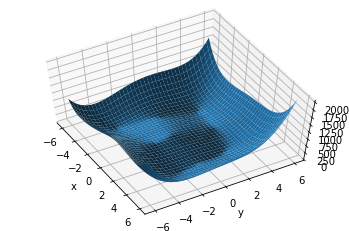

In [ ]:
import  numpy as np
from    mpl_toolkits.mplot3d import Axes3D
from    matplotlib import pyplot as plt
import  tensorflow as tf

def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print('x,y range:', x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)
Z = himmelblau([X, Y])

fig = plt.figure('himmelblau')
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z)
ax.view_init(60, -30)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [ ]:
# [1., 0.], [-4, 0.], [4, 0.]
#x = tf.constant([4., 0.])    # random start point
x = tf.constant([-4., 0.])    # random start point

for step in range(1200):

    with tf.GradientTape() as tape:
        tape.watch([x])
        y = himmelblau(x)

    grads = tape.gradient(y, [x])[0] 

    # update x 
    x -= 0.01*grads

    

    if step % 200 == 0:
        print ('step {}: x = {}, f(x) = {}'.format(step, x.numpy(), y.numpy()))

step 0: x = [-2.98       -0.09999999], f(x) = 146.0
step 200: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 400: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 600: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 800: x = [-3.7793102 -3.283186 ], f(x) = 0.0
step 1000: x = [-3.7793102 -3.283186 ], f(x) = 0.0


# Project: Fashion-MNIST Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics
import os 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

BATCH_SIZE = 128


def preprocess(x, y):
  # x = tf.convert_to_tensor(x, dtype = tf.float32) /255.   # min-max norm
  # y = tf.convert_to_tensor(x, dtype = tf.int32)

  # x and y are already tensors, no need to convert
  x = tf.cast(x, dtype = tf.float32) /255.   # min-max norm
  y = tf.cast(y, dtype = tf.int32)
  #y = tf.one_hot(y, depth=10)

  return x, y


(x, y), (x_test, y_test) = datasets.fashion_mnist.load_data()
#print(x.shape, y.shape)
db_train = tf.data.Dataset.from_tensor_slices((x, y))
db_train = db_train.map(preprocess).shuffle(10000).batch(BATCH_SIZE)

db_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
db_test = db_test.map(preprocess).shuffle(10000).batch(BATCH_SIZE)

# check batch size
db_iter = iter(db_train)
sample = next(db_iter)
print('batch: ', sample[0].shape, sample[1].shape)

# fully connected layers
model = Sequential([
  layers.Dense(256, activation=tf.nn.relu), # [b, 784] -> [b, 256]
  layers.Dense(128, activation=tf.nn.relu), # [b, 256] -> [b, 128] 
  layers.Dense(64, activation=tf.nn.relu), # [b, 128] -> [b, 64] 
  layers.Dense(32, activation=tf.nn.relu), # [b, 64] -> [b, 32]
  layers.Dense(10) # [b, 32] -> [b, 10]      330 params = 32 nodes *10 nodes + 10 bias              
])

model.build(input_shape=[None, 28*28])
model.summary()

# w' = w -lr * grad
optimizer = optimizers.Adam(lr=1e-3)


def main():


  for epoch in range(30):

    # training
    for step, (x, y) in enumerate(db_train):

      # x: [b, 28, 28] => [b, 784]
      # y: [b]
      x = tf.reshape(x, [-1, 28*28])

      with tf.GradientTape() as tape:
        # [b, 784] => [b, 10]
        # for each pics, generate 10 sigmoid probs for each 10 classes
        logits = model(x)
        
        y_onehot = tf.one_hot(y, depth=10)

        loss_mse = tf.reduce_mean(tf.losses.MSE(y_onehot, logits))
        loss_ce = tf.reduce_mean(tf.losses.categorical_crossentropy(y_onehot, logits, from_logits=True))  # order of y and logits maters

      # calculate gradients
      grads = tape.gradient(loss_ce, model.trainable_variables)
      
      grads,  _ = tf.clip_by_global_norm(grads, 15)   
      # update weights by using gradient descent
      # w' = w - lr * grads
      optimizer.apply_gradients(zip(grads, model.trainable_variables))   # update parameters by using optimizer


      if step%100 == 0:
        print(epoch, step, "loss", float(loss_ce), float(loss_mse)) 


      # testing
      total_correct = 0
      total_num = 0
      
    for step, (x, y) in enumerate(db_test):
      # x: [b, 28, 28] => [b, 784]
      # y: [b]
      x = tf.reshape(x, [-1, 28*28])

      logits = model(x)

      # logits => probs
      # need to add sigmoid when test data
      probs = tf.nn.softmax(logits, axis = 1)

      # [b, 10] => [b]
      # only output predicted label
      pred = tf.argmax(probs, axis = 1)
      pred = tf.cast(pred, dtype=tf.int32)

      correct = tf.equal(pred, y)
      correct = tf.reduce_sum(tf.cast(correct, dtype=tf.int32))

      total_correct += int(correct)
      total_num += x.shape[0]


    # if step%100 == 0:
    acc = total_correct / total_num
    print(epoch, 'test acc:', acc)


if __name__ == '__main__':
  main()


batch:  (128, 28, 28) (128,)
Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_235 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_236 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_237 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_238 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_239 (Dense)            (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
0 0 loss 2.339433193206787 0.16137850284576416
0 100 loss 0.5691826939582825 18.5456